## Docks Availability Prediction - Data Analysis, Feature Selection and Modelization

# 1. Introduction

#### Bicing Prediction Project

This project aims to predict the percentage of docks available in the Bicing bike-sharing system in Barcelona. 
We will explore the dataset, perform feature engineering and feature selection, and train multiple machine learning models 
to find the best one.

# 2. Data Exploration and Preprocessing

**First Phase of Data Preprocessing Completed**

The initial phase of data preprocessing has already been completed and is documented in the "preprocess" folder of the project. During this first phase, the following tasks were carried out:

- **Data Download**: CSV files were downloaded for each month of the years 2020, 2021, 2022, and 2023. These data will be used to train and validate our models. The files are quite large as they include updates from Bicing stations every few minutes.
- **Preliminary Data Cleaning**: This includes handling missing values, among other tasks.
- **Calculation of the Target Variable**: The percentage of available docks was calculated.
- **Context Variables Calculation**: Variables ctx-1, ctx-2, ctx-3, and ctx-4 were computed.
- **Additional Variables Calculation**: Extra variables were calculated to strengthen the original dataset and potentially enhance our predictive models (feature engineering and addition of new variables from external sources).
- **Categorical Variables Encoding**: Some categorical variables were encoded.

Therefore, in this notebook, we will start with a previously preprocessed dataset that is ready for further data exploration, correlation determination, variable selection, and finally, the training and validation of the prediction models.

## 2.1. Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, datetime
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
%matplotlib inline
np.random.seed(31415)
sns.set(rc={'figure.figsize':(15,3)})
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('df_v2_cat.csv')
df.head()

,station_id,year,month,day,hour,percentage_docks_available,ctx-1,ctx-2,ctx-3,ctx-4,date,date_hour,day_info,is_weekend,is_holiday,is_not_workday,hour_info,season_info,lat,lon,altitude,post_code,capacity,neighborhood,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars
0,1,2020,1,1,4,0.364815,0.283333,0.346296,0.394444,0.459259,2020-01-01,2020-01-01 04:00:00,Wednesday,0,1,1,night,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
1,1,2020,1,1,9,0.262963,0.248148,0.235185,0.233333,0.298148,2020-01-01,2020-01-01 09:00:00,Wednesday,0,1,1,early_morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
2,1,2020,1,1,14,0.335185,0.381481,0.385185,0.337037,0.342593,2020-01-01,2020-01-01 14:00:00,Wednesday,0,1,1,morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
3,1,2020,1,1,19,0.209259,0.079630,0.177778,0.211111,0.244444,2020-01-01,2020-01-01 19:00:00,Wednesday,0,1,1,afternoon,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
4,1,2020,1,2,0,0.387037,0.420370,0.450000,0.492593,0.418519,2020-01-02,2020-01-02 00:00:00,Thursday,0,0,0,night,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2


In [3]:
df.shape

(2635990, 33)

Checking unique values to get and idea of the options we have in each variable

In [4]:
df.year.unique()

array([2020, 2021, 2022, 2023])

In [5]:
df.neighborhood.unique()

array(['el_Fort_Pienc', 'el_Parc_i_la_Llacuna_del_Poblenou',
       'Sant_Pere,_Santa_Caterina_i_la_Ribera',
       'la_Vila_Olímpica_del_Poblenou', 'la_Dreta_de_l_Eixample',
       'el_Camp_d_en_Grassot_i_Gràcia_Nova',
       'Diagonal_Mar_i_el_Front_Marítim_del_Poblenou', 'el_Barri_Gòtic',
       'la_Marina_del_Prat_Vermell', 'el_Poble-sec', 'el_Raval',
       'l_Antiga_Esquerra_de_l_Eixample', 'les_Corts',
       'la_Nova_Esquerra_de_l_Eixample', 'Sant_Antoni', 'Sants',
       'Sant_Gervasi_-_Galvany', 'el_Camp_de_l_Arpa_del_Clot', 'la_Salut',
       'Sant_Gervasi_-_la_Bonanova', 'el_Besòs_i_el_Maresme',
       'la_Marina_de_Port', 'Sarrià', 'les_Tres_Torres',
       'la_Vila_de_Gràcia', 'Navas', 'el_Guinardó', 'Sant_Andreu',
       'la_Vall_d_Hebron', 'Vilapicina_i_la_Torre_Llobeta',
       'el_Turó_de_la_Peira', 'Horta', 'Torre_Baró'], dtype=object)

In [6]:
df.nearby_stations.unique()

array([5, 3, 6, 4, 2, 1, 7, 9])

In [7]:
df.near_transport.unique()

array([1, 0])

In [8]:
df.near_college.unique()

array([0, 1])

In [9]:
df.nearby_colleges.unique()

array([0, 3, 1, 2, 5, 8])

In [10]:
df.nearby_bars.unique()

array([ 2,  0,  1, 19,  4, 14,  3,  5,  6,  8,  7, 11, 13, 18,  9, 10, 17])

Descriptive statistics

In [11]:
df.describe()

,station_id,year,month,day,hour,percentage_docks_available,ctx-1,ctx-2,ctx-3,ctx-4,is_weekend,is_holiday,is_not_workday,lat,lon,altitude,post_code,capacity,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars
count,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06,2.635990e+06
mean,2.202882e+02,2.021525e+03,6.600615e+00,1.567636e+01,1.152529e+01,5.737168e-01,5.737328e-01,5.737380e-01,5.737733e-01,5.737217e-01,2.816145e-01,4.306959e-02,3.131101e-01,4.139782e+01,2.169675e+00,3.015861e+01,8.018673e+03,2.748213e+01,3.337755e+00,6.916460e-01,1.379948e-01,2.810083e-01,2.180490e-01,7.265847e-02,2.179121e-01,4.233313e-01,1.291701e+00
std,1.258297e+02,1.093591e+00,3.464877e+00,8.745985e+00,6.910863e+00,2.719879e-01,2.720335e-01,2.720395e-01,2.720321e-01,2.719680e-01,4.497864e-01,2.030138e-01,4.637588e-01,1.917490e-02,2.423579e-02,2.708300e+01,1.142447e+01,6.607437e+00,1.429100e+00,4.618137e-01,3.448946e-01,9.244733e-01,4.129209e-01,2.595751e-01,4.128274e-01,4.940870e-01,2.547240e+00
min,1.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.135707e+01,2.111541e+00,2.000000e+00,8.001000e+03,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.140000e+02,2.021000e+03,4.000000e+00,8.000000e+00,6.000000e+00,3.703704e-01,3.703704e-01,3.703704e-01,3.703704e-01,3.703704e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.138384e+01,2.151621e+00,7.000000e+00,8.009000e+03,2.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.210000e+02,2.022000e+03,7.000000e+00,1.600000e+01,1.200000e+01,6.111111e-01,6.111111e-01,6.111111e-01,6.111111e-01,6.111111e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.139416e+01,2.173002e+00,2.200000e+01,8.018000e+03,2.700000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.250000e+02,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,8.044872e-01,8.044872e-01,8.044872e-01,8.044872e-01,8.044872e-01,1.000000e+00,0.000000e+00,1.000000e+00,4.140821e+01,2.188905e+00,4.400000e+01,8.028000e+03,3.100000e+01,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,4.960000e+02,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.145061e+01,2.220691e+00,1.210000e+02,8.042000e+03,5.400000e+01,9.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01


In [12]:
min(df['altitude'])

2

In [13]:
max(df['altitude'])

121

## 2.2. Data Exploration

#### Distribution of docks availability

<Axes: >

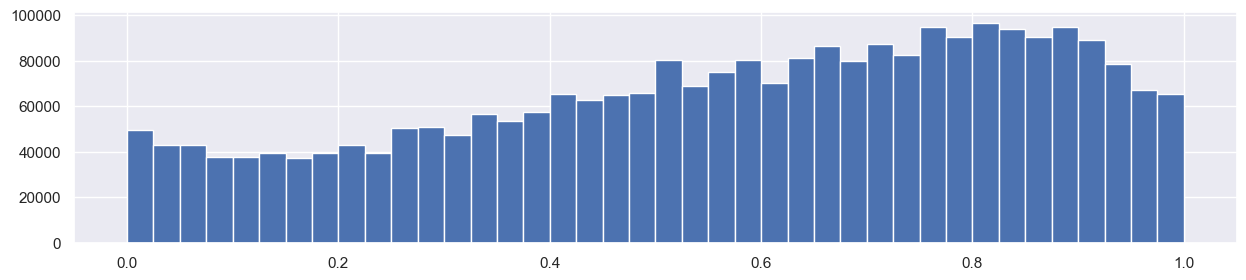

In [14]:
df['percentage_docks_available'].hist(bins=40)

### 2.2.1. Year 2020 and COVID-19

The year 2020 was highly atypical due to the global COVID-19 pandemic, which drastically altered usual human activity patterns, including transportation and bike-sharing usage. Incorporating data from this year into our machine learning models could lead to inaccurate interpretations and the identification of patterns that do not reflect normal conditions.

**Unrepresentative User Behavior**:
- Lockdowns and Restrictions
- Remote Work and Study

**Anomalous Data Patterns**:
- Abnormal Fluctuations: Specific pandemic-related events, such as phases of reopening or new lockdowns, created sharp, non-recurring changes in usage patterns.

**Impact on Model Accuracy**:
- Misleading Predictions: Including 2020 data could introduce anomalies and noise, leading to the model learning patterns that do not generalize well to other years.

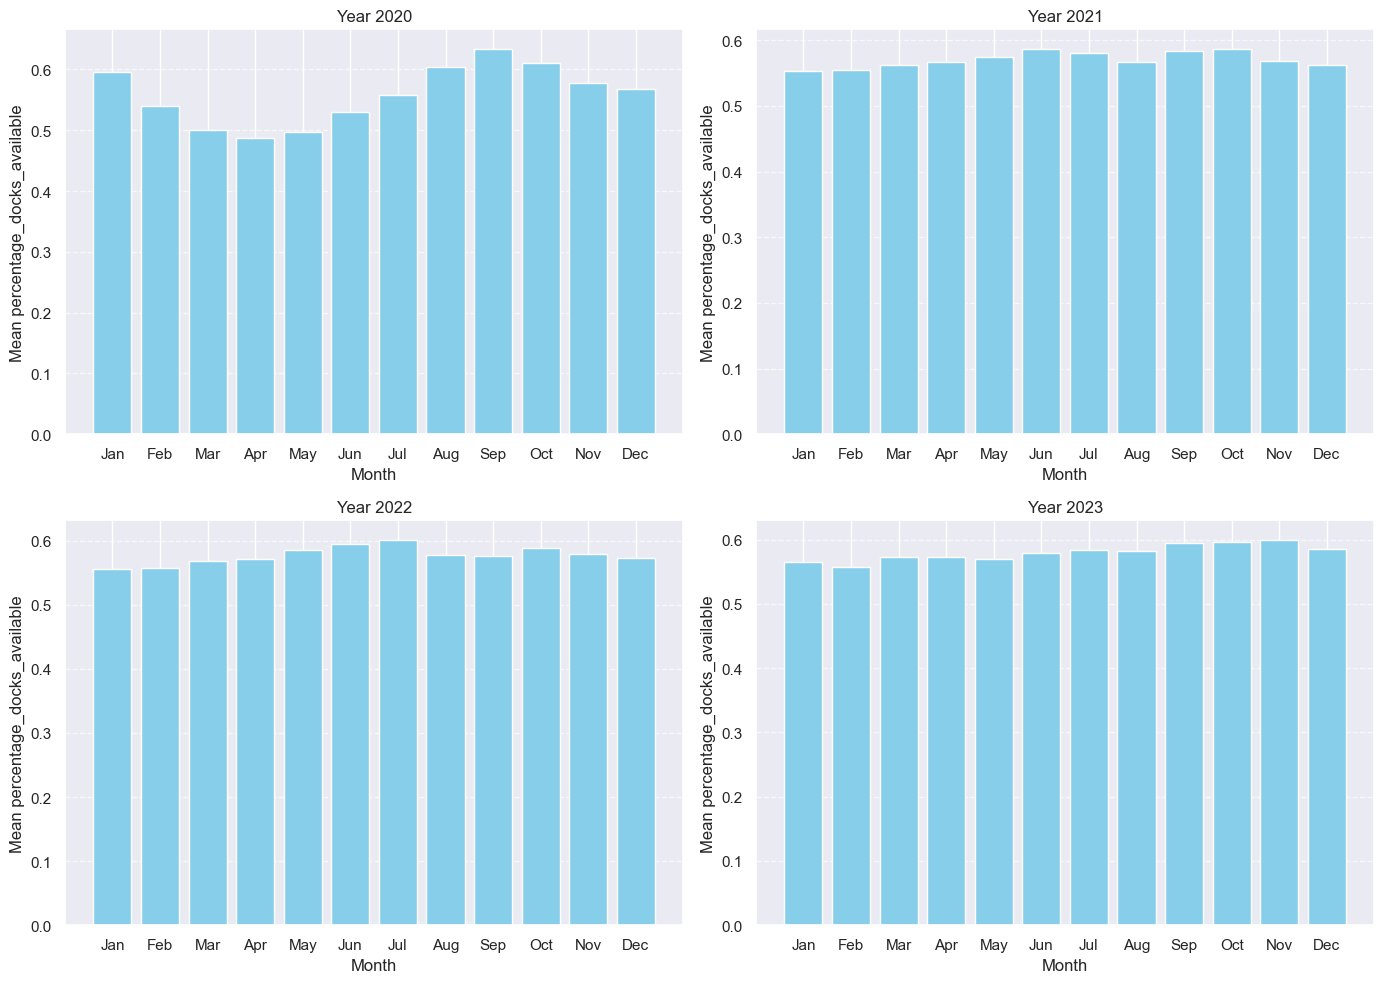

In [15]:
# Let's get some insights regarding year 2020

def plot_monthly_distribution(df):
    unique_years = df['year'].unique()
    num_years = len(unique_years)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration
    
    for i, year_to_plot in enumerate(unique_years):
        df_year = df[df['year'] == year_to_plot]
        monthly_stats = df_year.groupby('month')['percentage_docks_available'].mean()
        
        axes[i].bar(monthly_stats.index, monthly_stats.values, color='skyblue')
        axes[i].set_title(f'Year {year_to_plot}')
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel('Mean percentage_docks_available')
        axes[i].set_xticks(range(1, 13))
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot distributions for each year
plot_monthly_distribution(df)

In [16]:
# https://www.bicing.barcelona/es/node/159

In 2020, we observe a clear difference in the percentage of docks availability compared to the years 2021, 2022, and 2023, which show similar patterns among them. The mean percentage of docks available per month is relatively constant across these years, except for 2020 (specially March, April, May and June).

#### Focus on Normalcy: Let's not use 2020

By excluding 2020, we ensure that the training data reflects regular, predictable patterns of bike usage, which enhances the robustness and reliability of our predictions.
Models trained on data from more representative years (e.g., 2021, 2022, 2023) are more likely to generalize well to future conditions, providing more accurate and actionable insights.
For these reasons, we have decided to exclude data from 2020 in our predictive modeling efforts. This approach allows us to create models that better reflect typical user behavior and provide more reliable predictions for the percentage of available docks in our bike-sharing system.

In [17]:
df.shape

(2635990, 33)

In [18]:
df = df[df['year'] != 2020]

In [19]:
df.shape

(2033623, 33)

### 2.2.2. Season information

Text(0.5, 0, 'Season')

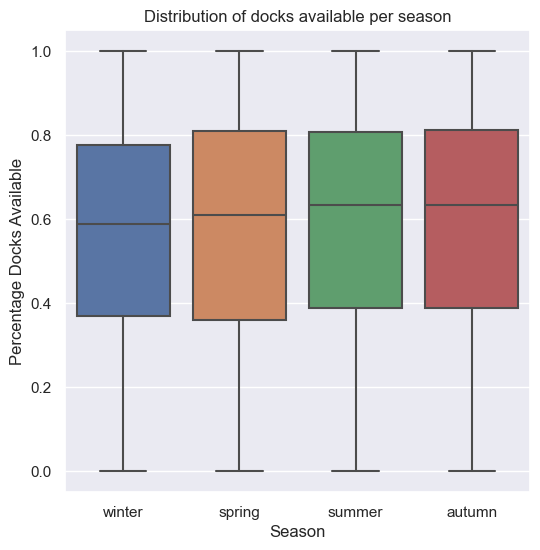

In [20]:
plt.figure(figsize=(6, 6))
sns.boxplot(df, x='season_info', y='percentage_docks_available')
plt.title('Distribution of docks available per season')
plt.ylabel('Percentage Docks Available')
plt.xlabel('Season')

During winter and spring the mean of percentage of docks available per hour is smaller than in summer and autumn. This can be explained by the fact that during warmer months people tend to use more the Bicing and that's why you can find a largest percentage of docks available.
The variability is quite similar for all the seasons.

### 2.2.3. Day of the week information

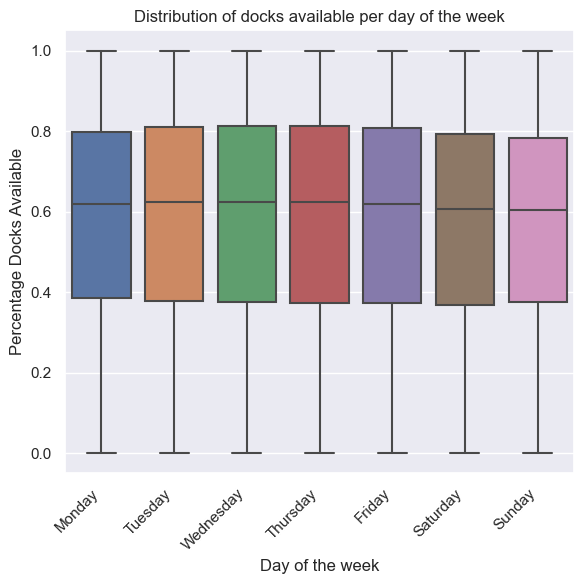

In [21]:
# Specify the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(6, 6)) 

# Plot the boxplot with specified order
sns.boxplot(data=df, x='day_info', y='percentage_docks_available', order=day_order)
plt.title('Distribution of docks available per day of the week')
plt.ylabel('Percentage Docks Available')
plt.xlabel('Day of the week')

# Tilt x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [22]:
df.groupby('day_info')['percentage_docks_available'].mean().sort_values(ascending=False)

day_info
Tuesday      0.580460
Wednesday    0.580150
Thursday     0.579390
Monday       0.579013
Friday       0.577226
Saturday     0.568189
Sunday       0.567979
Name: percentage_docks_available, dtype: float64

There's a difference between the mean of percentage of docks available regarding if it's weekday or weekend. For the week days, it seems there's a little bit of difference between Monday and Friday and the rest of the week days. However, it's very slight.

### 2.2.4. Time of the day information

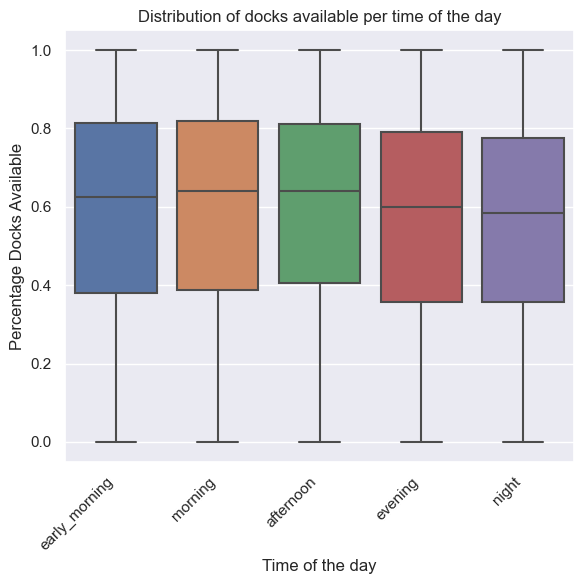

In [23]:
# Specify the order of days of the week
hour_order = ['early_morning', 'morning', 'afternoon', 'evening', 'night']

plt.figure(figsize=(6, 6))

# Plot the boxplot with specified order
sns.boxplot(data=df, x='hour_info', y='percentage_docks_available', order=hour_order)
plt.title('Distribution of docks available per time of the day')
plt.ylabel('Percentage Docks Available')
plt.xlabel('Time of the day')

# Tilt x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [24]:
df.groupby('hour_info')['percentage_docks_available'].mean().sort_values(ascending=False)

hour_info
afternoon        0.593926
morning          0.588373
early_morning    0.582209
evening          0.563194
night            0.555224
Name: percentage_docks_available, dtype: float64

We see how during the morning and afternoon is when you can find less docks available in general. And during the evening and night, where you can find less docks available. It makes sense because during the night less people is using the bikes and therefore the stations are full of bikes.

### 2.2.5. Altitude

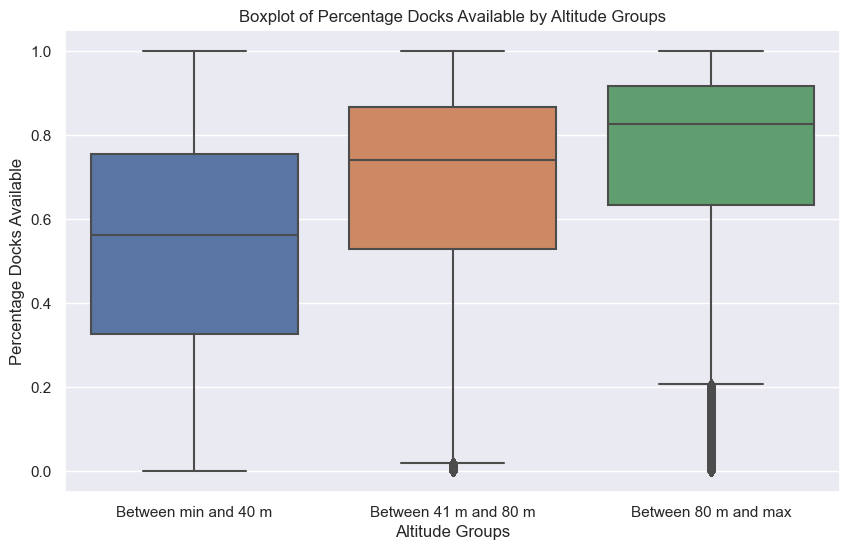

In [25]:
# Create quartile groups based on altitude
df['altitude_group'] = pd.cut(df['altitude'], bins=[df['altitude'].min(), 40, 80, df['altitude'].max()],
                              labels=['Between min and 40 m', 'Between 41 m and 80 m', 'Between 80 m and max'])

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='altitude_group', y='percentage_docks_available')
plt.title('Boxplot of Percentage Docks Available by Altitude Groups')
plt.xlabel('Altitude Groups')
plt.ylabel('Percentage Docks Available')
plt.show()

The availability of docks at the different stations in Barcelona is significantly influenced by the altitude at which these stations are located.

- **Downhill Preference**: Stations situated at higher altitudes generally have more available docks. This is because users prefer riding bikes downhill, which requires less physical effort. Consequently, bikes are frequently taken from higher-altitude stations and ridden to lower-altitude areas.
- **Accumulation at Low Altitudes**: The tendency to ride downhill causes an accumulation of bikes at lower-altitude stations, where users finish their journeys. As a result, these stations often have fewer available docks.

To address these imbalances, bike-sharing operators often need to engage in rebalancing efforts, where bikes are transported from lower to higher-altitude stations. However, these efforts can only partially mitigate the natural flow patterns dictated by altitude.

Additionally, in our dataset, it is difficult to detect when bike-sharing operators rebalance the stations. Therefore, although we can observe some differences related to altitude, these are somewhat mitigated by the rebalancing efforts. What we mean is that if this rebalancing operation did not exist, we would see that altitude has a much more significant impact on dock availability.

In [26]:
# Drop the column we've used only for plotting the above graphic
df.drop(columns=['altitude_group'], inplace=True)

### 2.2.6. Near and Nearby additional variables

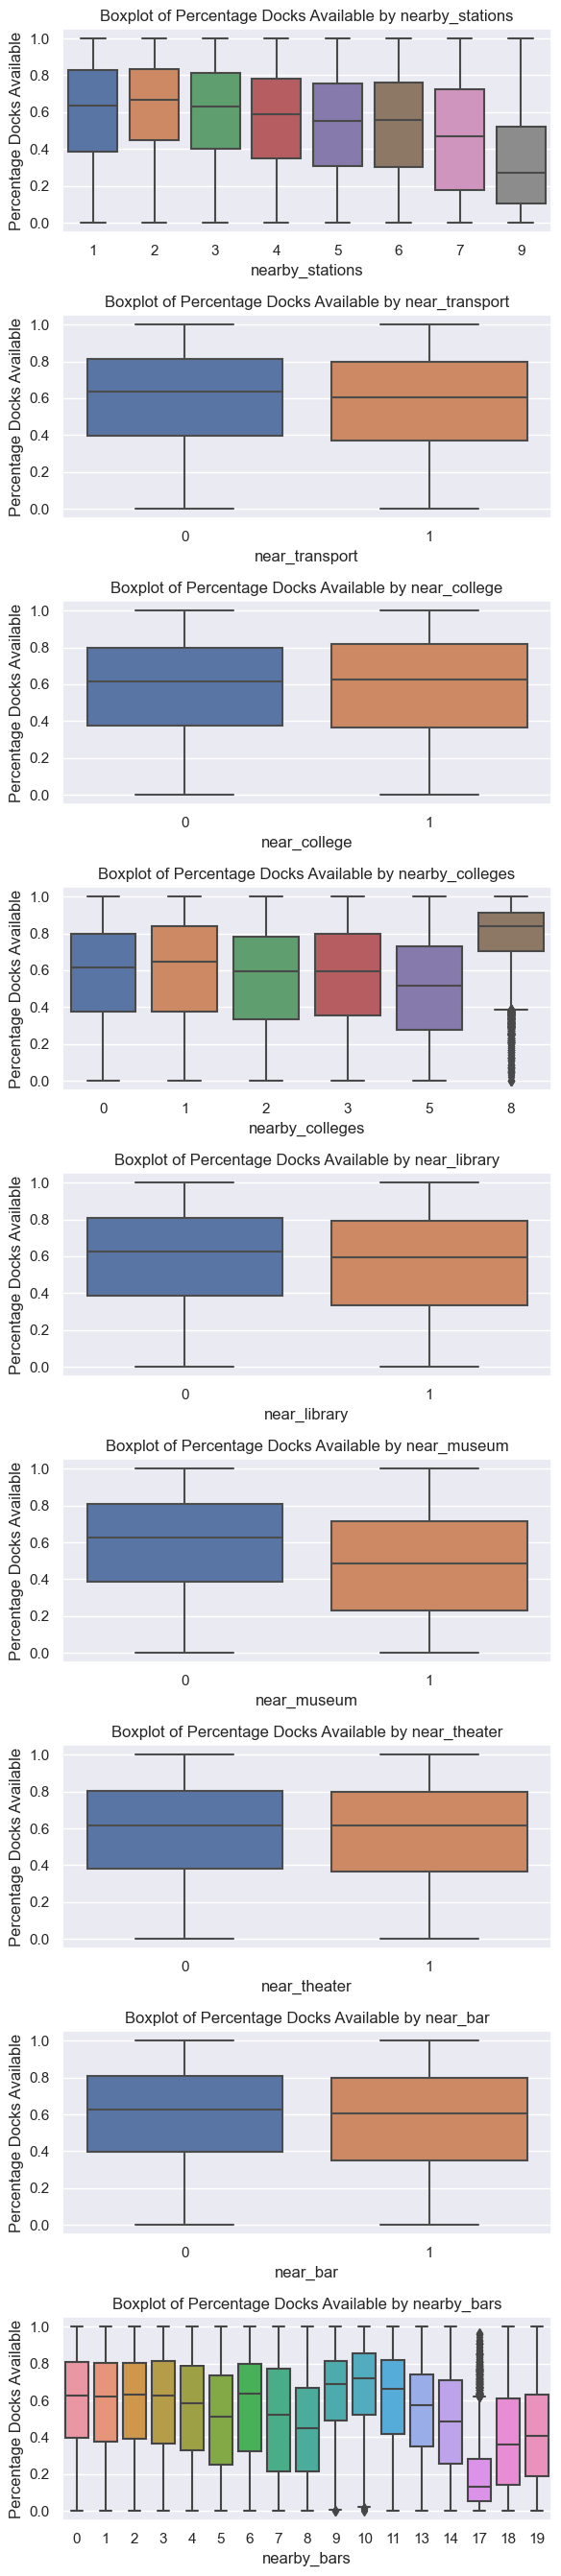

In [27]:
# Given list of variables
variables_to_plot = ['nearby_stations', 'near_transport', 'near_college', 'nearby_colleges', 'near_library',
                     'near_museum', 'near_theater', 'near_bar', 'nearby_bars']

# Number of variables to plot
n_vars = len(variables_to_plot)

# Create a figure with subplots
fig, axes = plt.subplots(n_vars, 1, figsize=(6, 3 * n_vars))

for i, var in enumerate(variables_to_plot):
    sns.boxplot(ax=axes[i], data=df, x=var, y='percentage_docks_available')
    axes[i].set_title(f'Boxplot of Percentage Docks Available by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage Docks Available')

plt.tight_layout()
plt.show()

Some variables do not show a significant difference, whereas others seem to indicate a difference at certain values, such as nearby stations, nearby colleges, and nearby museums. We will see during the feature selection process which variables we ultimately include.

### 2.2.7. Weekdays and Weekend

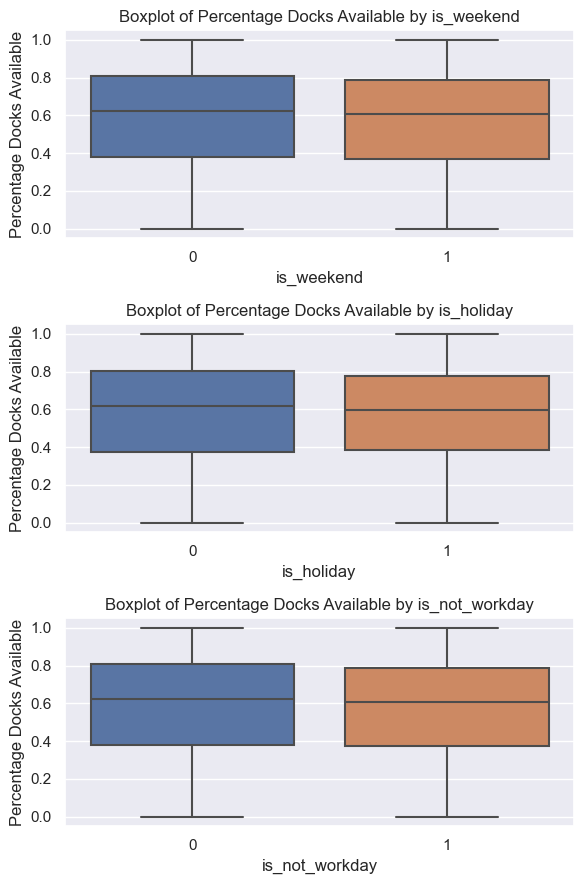

In [28]:
# Given list of variables
variables_to_plot = ['is_weekend', 'is_holiday', 'is_not_workday']

# Number of variables to plot
n_vars = len(variables_to_plot)

# Create a figure with subplots
fig, axes = plt.subplots(n_vars, 1, figsize=(6, 3 * n_vars))

for i, var in enumerate(variables_to_plot):
    sns.boxplot(ax=axes[i], data=df, x=var, y='percentage_docks_available')
    axes[i].set_title(f'Boxplot of Percentage Docks Available by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage Docks Available')

plt.tight_layout()
plt.show()

We detect a difference, although it seems minimal. Again, let's wait and see during the feature selection process.

### 2.2.8. Neighborhood and post_code

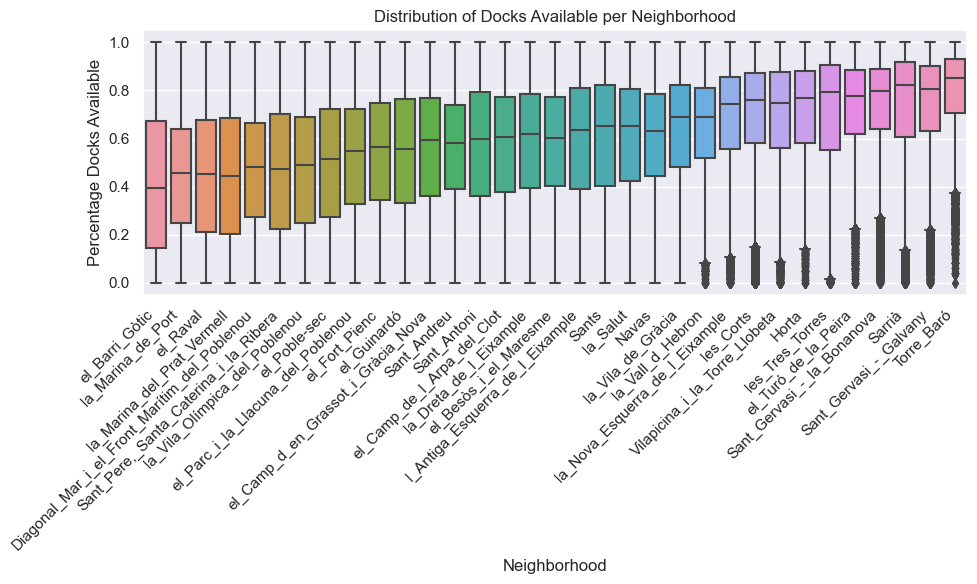

In [29]:
# Calculate the mean of percentage_docks_available for each neighborhood
neighborhood_order = df.groupby('neighborhood')['percentage_docks_available'].mean().sort_values().index

# Set the order of neighborhoods in the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighborhood', y='percentage_docks_available', order=neighborhood_order)
plt.title('Distribution of Docks Available per Neighborhood')
plt.ylabel('Percentage Docks Available')
plt.xlabel('Neighborhood')

# Tilt x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

If you are familiar with Barcelona, you can clearly see how the altitude of each neighborhood affects the availability of docks. Therefore, the altitude variable is somewhat implicit in the neighborhood variable. However, other characteristics of the neighborhood can also be important for dock availability, indicating that this variable can add additional information to our dataset.

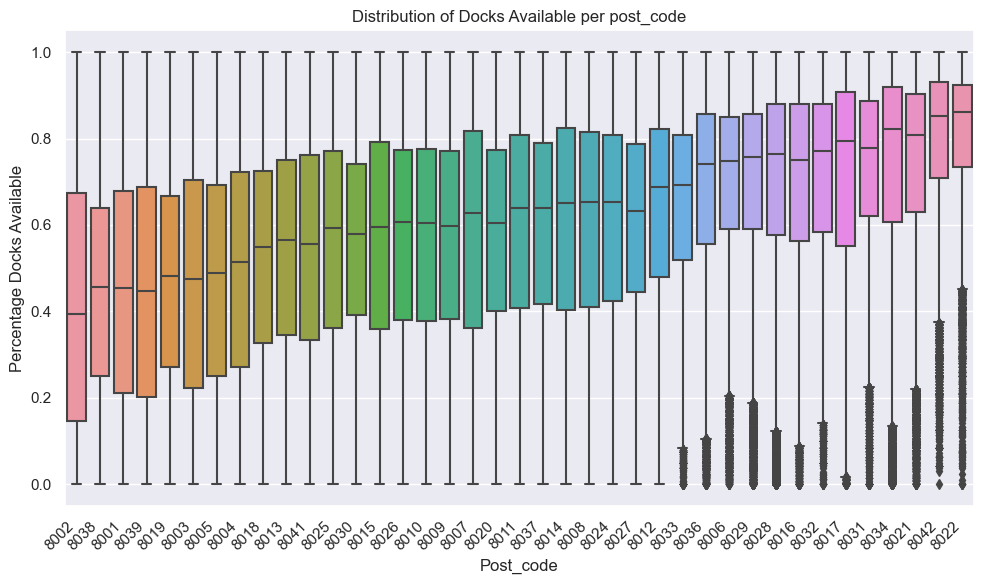

In [30]:
# Calculate the mean of percentage_docks_available for each neighborhood
neighborhood_order = df.groupby('post_code')['percentage_docks_available'].mean().sort_values().index

# Set the order of neighborhoods in the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='post_code', y='percentage_docks_available', order=neighborhood_order)
plt.title('Distribution of Docks Available per post_code')
plt.ylabel('Percentage Docks Available')
plt.xlabel('Post_code')

# Tilt x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

The postcode and neighborhood are highly correlated. However, some postcodes can encompass more than one neighborhood. Ultimately, we will only use one of these two variables.

## 2.3. Correlations

### 2.3.1. Heatmap

Let's first select numerical variables.

In [31]:
num_var = ['year', 'month', 'day', 'hour', 'percentage_docks_available', 'ctx-1', 'ctx-2', 'ctx-3', 'ctx-4',
           'lat', 'lon', 'altitude', 'capacity', 'nearby_stations', 'nearby_colleges']

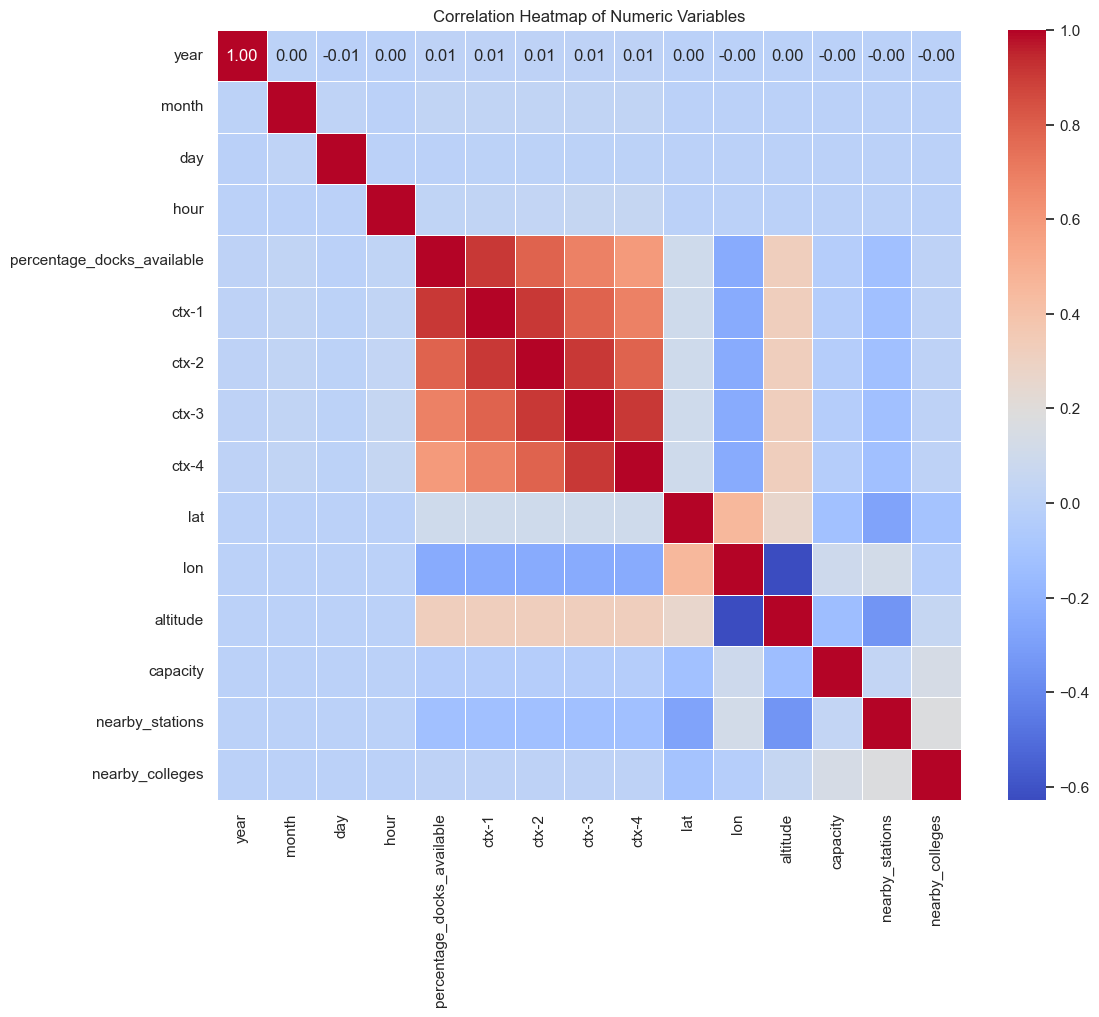

In [32]:
# Subset the DataFrame with numeric columns
df_numeric = df[num_var]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

While treating the variables month and hour as numerical doesn't show correlation, we could consider treating months as categorical and using categorical hour_info instead. Capacity and latitude also do not appear correlated with our target variable. The most correlated numerical variables are: ctx-1, ctx-2, ctx-3, ctx-4, altitude and nearby_stations. Plus, context variables are also correlated between them

# 3. Model training and Evaluation

## 3.1. Test dataset from Kaggle

In [33]:
test = pd.read_csv('df_test_v2_cat.csv')
test.head()

,station_id,year,month,day,hour,ctx-1,ctx-2,ctx-3,ctx-4,date,date_hour,day_info,is_weekend,is_holiday,is_not_workday,hour_info,season_info,lat,lon,altitude,post_code,capacity,neighborhood,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars
0,1,2024,1,1,5,0.750000,0.696296,0.677778,0.781482,2024-01-01,2024-01-01 05:00:00,Monday,0,1,1,night,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
1,1,2024,1,1,10,0.731624,0.711111,0.711111,0.737374,2024-01-01,2024-01-01 10:00:00,Monday,0,1,1,morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
2,1,2024,1,1,15,0.883333,0.901852,0.896296,0.827778,2024-01-01,2024-01-01 15:00:00,Monday,0,1,1,afternoon,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
3,1,2024,1,1,20,0.918519,0.927778,0.874074,0.825926,2024-01-01,2024-01-01 20:00:00,Monday,0,1,1,evening,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2
4,2,2024,1,1,3,0.540230,0.275862,0.341954,0.592593,2024-01-01,2024-01-01 03:00:00,Monday,0,1,1,night,winter,41.395488,2.177198,17,8013,29,el_Fort_Pienc,5,1,0,0,0,0,0,0,0


In [34]:
test.shape

(171902, 32)

In [35]:
test.shape

(171902, 32)

## 3.2. Train and Validation

Now, let's split our dataframe (df) into training and validation datasets. The test dataframe is the one provided on Kaggle. We need to consider that we are dealing with temporal data, so during the split process, we must respect the temporal order. For instance, we cannot have data from December 2023 in our training dataset and data from 2021 in our validation dataset. Additionally, it is important to account for the variable station_id during this step.

In [36]:
# Function to split train and validation 80/20

def train_validation_split(df):
    # Order by time (Year, Month, Day, Hour, station_id)
    df_to_split = df.sort_values(by=['year', 'month', 'day', 'hour', 'station_id']).reset_index(drop=True)
    # Calculate the index that divide the dataframe by 80/20
    train_size = int(len(df_to_split) * 0.8)
    # Create column named "index"
    df_to_split['index'] = df_to_split.index
    # Get train and validation dataframes
    train = df_to_split.iloc[:train_size]
    validation = df_to_split.iloc[train_size:]
    
    # Reorder again by station_id first
    train = train.sort_values(by=['station_id','year', 'month', 'day', 'hour']).reset_index(drop=True)
    validation = validation.sort_values(by=['station_id','year', 'month', 'day', 'hour']).reset_index(drop=True)

    return train, validation

In [37]:
train, validation = train_validation_split(df)

In [38]:
train.head()

,station_id,year,month,day,hour,percentage_docks_available,ctx-1,ctx-2,ctx-3,ctx-4,date,date_hour,day_info,is_weekend,is_holiday,is_not_workday,hour_info,season_info,lat,lon,altitude,post_code,capacity,neighborhood,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars,index
0,1,2021,1,1,1,0.111111,0.122222,0.068519,0.053704,0.046296,2021-01-01,2021-01-01 01:00:00,Friday,0,1,1,night,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,81
1,1,2021,1,1,6,0.028283,0.066667,0.111111,0.111111,0.111111,2021-01-01,2021-01-01 06:00:00,Friday,0,1,1,early_morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,479
2,1,2021,1,1,11,0.527273,0.485185,0.487037,0.461111,0.056410,2021-01-01,2021-01-01 11:00:00,Friday,0,1,1,morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,877
3,1,2021,1,1,16,0.372222,0.453704,0.485185,0.557407,0.555556,2021-01-01,2021-01-01 16:00:00,Friday,0,1,1,afternoon,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1275
4,1,2021,1,1,21,0.633333,0.396296,0.279630,0.318519,0.342593,2021-01-01,2021-01-01 21:00:00,Friday,0,1,1,evening,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1673


In [39]:
train.shape

(1626898, 34)

In [40]:
validation.head()

,station_id,year,month,day,hour,percentage_docks_available,ctx-1,ctx-2,ctx-3,ctx-4,date,date_hour,day_info,is_weekend,is_holiday,is_not_workday,hour_info,season_info,lat,lon,altitude,post_code,capacity,neighborhood,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars,index
0,1,2023,5,15,16,0.479630,0.533333,0.637037,0.703704,0.811111,2023-05-15,2023-05-15 16:00:00,Monday,0,0,0,afternoon,spring,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1627138
1,1,2023,5,15,21,0.633333,0.668519,0.261111,0.362963,0.442593,2023-05-15,2023-05-15 21:00:00,Monday,0,0,0,evening,spring,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1627535
2,1,2023,5,16,2,0.509259,0.533333,0.575926,0.600000,0.612963,2023-05-16,2023-05-16 02:00:00,Tuesday,0,0,0,night,spring,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1627933
3,1,2023,5,16,7,0.993939,0.920370,0.653704,0.538889,0.500000,2023-05-16,2023-05-16 07:00:00,Tuesday,0,0,0,early_morning,spring,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1628331
4,1,2023,5,16,12,0.796296,0.896296,0.961111,0.998291,0.989899,2023-05-16,2023-05-16 12:00:00,Tuesday,0,0,0,morning,spring,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1628728


In [41]:
validation.shape

(406725, 34)

## 3.3. Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 3.3.1. Feature selection

In [43]:
features_to_keep_lr = ['percentage_docks_available', 'ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour',
                    'altitude', 'is_weekend']
features_to_keep_test_lr = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour', 'altitude', 'is_weekend']

In [44]:
# Drop columns from DataFrame
train_lr = train[features_to_keep_lr]
validation_lr = validation[features_to_keep_lr]
test_lr = test[features_to_keep_test_lr]

### 3.3.2. Training and Prediction

In [45]:
# Define the columns
numerical_features = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour', 'altitude', 'is_weekend']

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = MinMaxScaler()

# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create the pipeline that combines the preprocessing step and the linear regression model
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Separate the target variable and features
X_train = train_lr.drop(columns=['percentage_docks_available'])
y_train = train_lr['percentage_docks_available']

X_validation = validation_lr.drop(columns=['percentage_docks_available'])
y_validation = validation_lr['percentage_docks_available']

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = lr_model.predict(X_validation)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_validation, y_pred)
print(f'Mean Squared Error on validation data: {mse}')

# Show the first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error on validation data: 0.010625800340971103
     Actual  Predicted
0  0.479630   0.508936
1  0.633333   0.742852
2  0.509259   0.526387
3  0.993939   0.929151
4  0.796296   0.838821


In [46]:
# Calculate RMSE
rmse = mean_squared_error(y_validation, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.10308152279128933


In [47]:
from sklearn.metrics import mean_squared_error, r2_score 
r2_val = r2_score(y_validation, y_pred)
print(f'Validation R^2 Score: {r2_val}')

Validation R^2 Score: 0.8484644676948296


### 3.3.3. Feature Importance

In [48]:
# Get the coefficients from the model
coefficients = lr_model.named_steps['regressor'].coef_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': numerical_features,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Select the top 20 features
top_20_features = feature_importance.head(7)

# Print the top 20 features
print(top_20_features)

      Feature  Coefficient  AbsCoefficient
0       ctx-1     1.099282        1.099282
1       ctx-2    -0.266597        0.266597
2       ctx-3     0.075411        0.075411
5    altitude     0.044510        0.044510
3       ctx-4    -0.031849        0.031849
4        hour    -0.004383        0.004383
6  is_weekend    -0.001677        0.001677


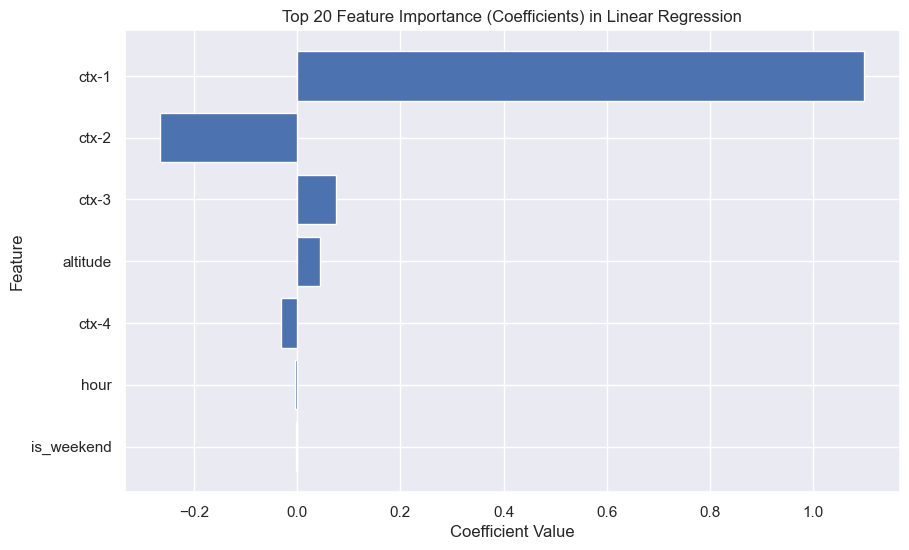

In [49]:
# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance (Coefficients) in Linear Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

**Linear Regression**:
- **Simplicity**: Easy to implement and interpret. Serves as a good baseline model.
- **Linear Relationships**: Assumes a linear relationship between features and the target variable, which might not capture the complexities in bike-sharing data.
- **Feature Independence**: Assumes independence of features, which might not be true in real-world scenarios.
- **Limited Handling of Categorical Variables**: Requires extensive preprocessing of categorical variables.
- Can also handle binary features but treats them in a linear manner, which might not capture all the complexities.

## 3.4. XGBoost

**XGBoost (eXtreme Gradient Boosting)** is an advanced and efficient implementation of the gradient boosting algorithm, designed to enhance performance and speed. It has become popular due to its robust handling of large datasets and superior predictive accuracy.

**Key Features of XGBoost**:
- **Gradient Boosting Framework**: Combines multiple weak learners (usually decision trees) to create a strong predictive model. The idea is to sequentially add trees that correct the errors of the previous ones.
- **Regularization**: Includes L1 (Lasso) and L2 (Ridge) regularization techniques to prevent overfitting, which helps improve generalization on unseen data.
- **Tree Pruning**: Uses a technique called max_depth to prune trees and reduce complexity.
- **Handling Complex Relationships**: Non-linear Relationships: XGBoost can model non-linear relationships between the features and the target variable. The relationship between bike dock availability and features like hour_info can be non-linear and complex.
- **Feature Interactions**: Automatically captures interactions between features, which can improve the accuracy of predictions.
- **Binary features**: Binary features such as "is_weekday" (0 or 1) are effectively handled by XGBoost. The algorithm can learn different splits based on these binary features, which can enhance predictive performance.
- **Categorical features**: Can handle the high-dimensional sparse matrix resulting from one-hot encoding effectively.

XGBoost is generally more capable of handling one-hot encoded categorical data and binary features due to its ability to capture non-linear relationships, handle sparse data efficiently, and automatically model interactions between features. While linear regression can work with these types of data, it often falls short in capturing the complexities and interactions that XGBoost can model effectively, leading to potentially better predictive performance with XGBoost.

In [50]:
xgb_model = xgb.XGBRFRegressor(
    objective='reg:logistic', 
    eval_metric='rmse', n_estimators=200, max_depth=5)

In [51]:
train.head()

,station_id,year,month,day,hour,percentage_docks_available,ctx-1,ctx-2,ctx-3,ctx-4,date,date_hour,day_info,is_weekend,is_holiday,is_not_workday,hour_info,season_info,lat,lon,altitude,post_code,capacity,neighborhood,nearby_stations,near_transport,near_college,nearby_colleges,near_library,near_museum,near_theater,near_bar,nearby_bars,index
0,1,2021,1,1,1,0.111111,0.122222,0.068519,0.053704,0.046296,2021-01-01,2021-01-01 01:00:00,Friday,0,1,1,night,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,81
1,1,2021,1,1,6,0.028283,0.066667,0.111111,0.111111,0.111111,2021-01-01,2021-01-01 06:00:00,Friday,0,1,1,early_morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,479
2,1,2021,1,1,11,0.527273,0.485185,0.487037,0.461111,0.056410,2021-01-01,2021-01-01 11:00:00,Friday,0,1,1,morning,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,877
3,1,2021,1,1,16,0.372222,0.453704,0.485185,0.557407,0.555556,2021-01-01,2021-01-01 16:00:00,Friday,0,1,1,afternoon,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1275
4,1,2021,1,1,21,0.633333,0.396296,0.279630,0.318519,0.342593,2021-01-01,2021-01-01 21:00:00,Friday,0,1,1,evening,winter,41.397978,2.180107,16,8013,45,el_Fort_Pienc,5,1,0,0,0,0,0,1,2,1673


### 3.4.1. Feature selection

In [52]:
features_to_keep_xgb = ['percentage_docks_available', 'ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour',
                    'altitude', 'is_weekend', 'hour_info', 'season_info', 'post_code', 'nearby_stations', 'near_transport',
                       'near_college', 'nearby_colleges', 'near_museum']
features_to_keep_test_xgb = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour',
                    'altitude', 'is_weekend', 'hour_info', 'season_info', 'post_code', 'nearby_stations', 'near_transport',
                       'near_college', 'nearby_colleges', 'near_museum']

In [53]:
# Drop columns from DataFrame
train_xgb = train[features_to_keep_xgb]
validation_xgb = validation[features_to_keep_xgb]
test_xgb = test[features_to_keep_test_xgb]

### 3.4.2. Training and Prediction

In [54]:
# Define the columns
numerical_features = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour', 'altitude', 'nearby_stations', 'nearby_colleges']
categorical_features = ['hour_info', 'season_info', 'post_code']
binary_features = ['is_weekend', 'near_transport', 'near_college', 'near_museum']

In [55]:
# Create the preprocessing pipelines for numerical and categorical data
numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder()

# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)  # Binary features passthrough
    ])

# Separate the target variable and features
X_train = train_xgb.drop(columns=['percentage_docks_available'])
y_train = train_xgb['percentage_docks_available']

X_validation = validation_xgb.drop(columns=['percentage_docks_available'])
y_validation = validation_xgb['percentage_docks_available']

# Fit the preprocessors on the training data
preprocessor.fit(X_train)

# Transform the training and validation data
X_train_transformed = preprocessor.transform(X_train)
X_validation_transformed = preprocessor.transform(X_validation)
X_test_tranformed = preprocessor.transform(test_xgb)


# Train the XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')
xgb_regressor.fit(X_train_transformed, y_train)

# Predict on the validation data
y_pred = xgb_regressor.predict(X_validation_transformed)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_validation, y_pred)
print(f'Mean Squared Error on validation data: {mse}')

# Show the first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error on validation data: 0.00927920681760859
     Actual  Predicted
0  0.479630   0.509023
1  0.633333   0.663544
2  0.509259   0.527130
3  0.993939   0.936549
4  0.796296   0.840044


In [56]:
# Calculate RMSE
rmse = mean_squared_error(y_validation, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.09632863965409555


In [57]:
from sklearn.metrics import mean_squared_error, r2_score 
r2_val = r2_score(y_validation, y_pred)
print(f'Validation R^2 Score: {r2_val}')

Validation R^2 Score: 0.8676683638545032


### 3.4.3. Feature Importance

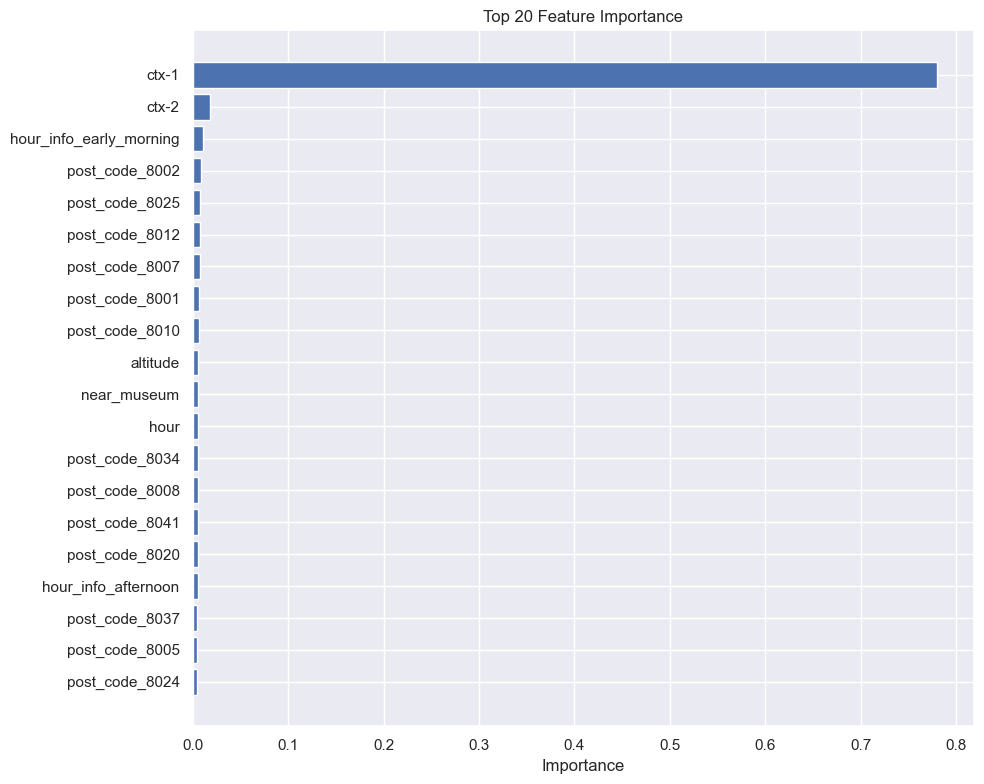

In [58]:
# Get feature names after transformation
numerical_features_plot = preprocessor.transformers_[0][2]  # Numerical feature names
categorical_features_plot = preprocessor.transformers_[1][1].get_feature_names_out(['hour_info', 'season_info', 'post_code'])  # Categorical feature names
binary_features_plot = ['is_weekend', 'near_transport', 'near_college', 'near_museum']  # Binary feature names

# Concatenate all feature names
feature_names = np.concatenate([numerical_features_plot, categorical_features_plot, binary_features_plot])

# Get feature importance
importance = xgb_regressor.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()

## 3.5. Light GBM

**LightGBM (Light Gradient Boosting Machine)** and **XGBoost (Extreme Gradient Boosting)** are both gradient boosting frameworks that excel in handling complex, non-linear relationships in data and are often used in machine learning for regression and classification tasks. Here are some reasons why LightGBM might be considered better than XGBoost in certain scenarios:
- **Speed and Efficiency**
- **Handling Large Datasets**
- **Categorical Feature Support**: LightGBM has built-in support for categorical features, which can be utilized without the need for one-hot encoding. This can save preprocessing time and memory, especially when dealing with datasets containing categorical variables with high cardinality.
- **Parameter Tuning**: LightGBM provides additional parameters for fine-tuning the model's performance, such as handling overfitting through regularization and controlling tree growth with parameters like num_leaves and min_data_in_leaf. This flexibility allows practitioners to optimize model performance more effectively.

In [59]:
# pip install lightgbm

### 3.5.1. Feature selection

Make sure we have my categorical variables defined as "category"

In [60]:
# We're going to treat the variable "hour" as a categorical feature instead of using "hour_info"

In [61]:
# Let's keep the rows we don't want to use
features_to_keep_lgbm = ['percentage_docks_available', 'ctx-1', 'ctx-2', 'post_code', 'hour', 'altitude', 'is_not_workday']
features_to_keep_test_lgbm = ['ctx-1', 'ctx-2', 'post_code', 'hour', 'altitude', 'is_not_workday']

In [62]:
# Drop columns from DataFrame
train_lgbm = train[features_to_keep_lgbm]
validation_lgbm = validation[features_to_keep_lgbm]
test_lgbm = test[features_to_keep_test_lgbm]

In [63]:
print(train_lgbm.dtypes)

percentage_docks_available    float64
ctx-1                         float64
ctx-2                         float64
post_code                       int64
hour                            int64
altitude                        int64
is_not_workday                  int64
dtype: object


### 3.5.2. Training and Prediction

In [64]:
# Convert specific columns to categorical type
columns_to_convert = ['post_code', 'hour']
train_lgbm[columns_to_convert] = train_lgbm[columns_to_convert].astype('category')
validation_lgbm[columns_to_convert] = validation_lgbm[columns_to_convert].astype('category')
test_lgbm[columns_to_convert] = test_lgbm[columns_to_convert].astype('category')

# Check the data types to confirm the changes
print(train_lgbm.dtypes)

percentage_docks_available     float64
ctx-1                          float64
ctx-2                          float64
post_code                     category
hour                          category
altitude                         int64
is_not_workday                   int64
dtype: object


#### Light GBM

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

# Define feature columns and target
target = 'percentage_docks_available'
columns_to_convert = ['post_code', 'hour']
columns_to_scale = ['ctx-1', 'ctx-2', 'altitude']

# Ensure categorical columns are treated as such
train_lgbm[columns_to_convert] = train_lgbm[columns_to_convert].astype('category')
validation_lgbm[columns_to_convert] = validation_lgbm[columns_to_convert].astype('category')
test_lgbm[columns_to_convert] = test_lgbm[columns_to_convert].astype('category')

# Separate features and target
X_train = train_lgbm.drop(columns=[target])
y_train = train_lgbm[target]
X_val = validation_lgbm.drop(columns=[target])
y_val = validation_lgbm[target]

# Scale numeric features
scaler = MinMaxScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test = test_lgbm.copy()
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Convert DataFrames to LightGBM Datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'num_leaves': 60,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'early_stopping_round': 50,
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'min_data_in_leaf': 20,
    'max_depth': 8
}

# Train model
model_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000
)

# Predict on validation data
y_pred = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, show the first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print(comparison.head())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 1626898, number of used features: 6
[LightGBM] [Info] Start training from score 0.573209
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0995721	valid_1's rmse: 0.0957699
Mean Squared Error: 0.009171869657551976
     Actual  Predicted
0  0.479630   0.524559
1  0.633333   0.666470
2  0.509259   0.522261
3  0.993939   0.947987
4  0.796296   0.848221


In [66]:
from sklearn.metrics import mean_squared_error, r2_score 
r2_val = r2_score(y_val, y_pred)
print(f'Validation R^2 Score: {r2_val}')

Validation R^2 Score: 0.8691991091314109


### 3.5.3. Feature Importance

          Feature     Importance
0           ctx-1  379500.767302
1           ctx-2   35996.876162
2       post_code    7553.171606
3            hour    5734.648390
4        altitude    2858.569710
5  is_not_workday     878.583539


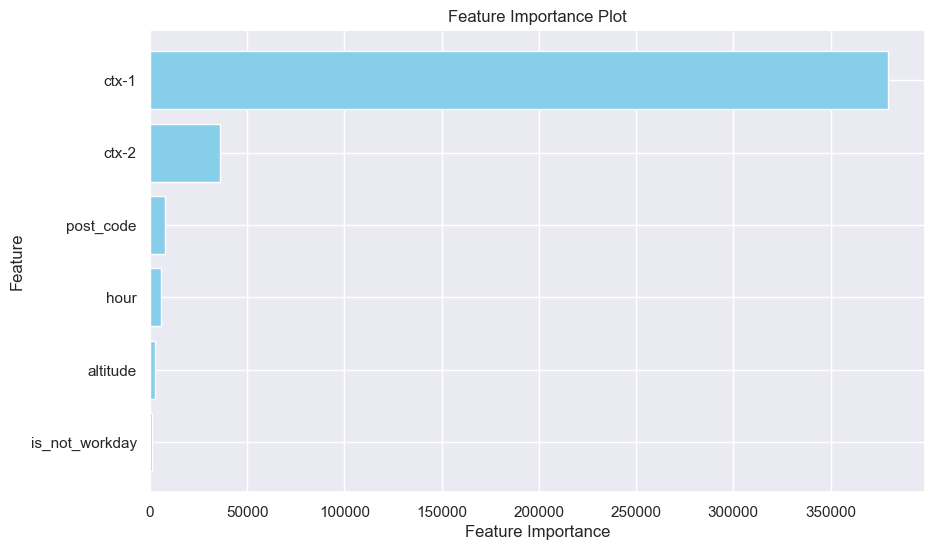

In [67]:
# Get feature importances
feature_importance = model_lgb.feature_importance(importance_type='gain')  # You can use 'gain', 'split', or 'weight'

# Create a DataFrame to store feature importances
fi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the top N most important features
print(fi_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [68]:
# Predict using the test set
y_pred_test_light_gbm = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

In [69]:
df_output_light_gbm = pd.DataFrame(y_pred_test_light_gbm)
df_output_light_gbm = df_output_light_gbm.reset_index()
df_output_light_gbm.columns = ['index','percentage_docks_available']

df_output_light_gbm.to_csv('Submission_15_LightGBM.csv',index=False)

In [70]:
df_output_light_gbm.head()

,index,percentage_docks_available
0,0,0.771277
1,1,0.753646
2,2,0.866175
3,3,0.876603
4,4,0.615764


## 3.6. Neural Networks

### 3.6.1. Feature selection

In [83]:
features_to_keep_nn = ['percentage_docks_available', 'ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour',
                    'altitude', 'is_weekend', 'hour_info', 'season_info', 'post_code', 'nearby_stations', 'near_transport',
                       'near_college', 'nearby_colleges', 'near_museum']
features_to_keep_test_nn = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour',
                    'altitude', 'is_weekend', 'hour_info', 'season_info', 'post_code', 'nearby_stations', 'near_transport',
                       'near_college', 'nearby_colleges', 'near_museum']

In [72]:
# Drop columns from DataFrame
train_nn = train[features_to_keep_nn]
validation_nn = validation[features_to_keep_nn]
test_nn = test[features_to_keep_test_nn]

### 3.6.2. Training and Prediction

In [73]:
# Define the columns
numerical_features = ['ctx-1', 'ctx-2', 'ctx-3', 'ctx-4', 'hour', 'altitude', 'nearby_stations', 'nearby_colleges']
categorical_features = ['hour_info', 'season_info', 'post_code']
binary_features = ['is_weekend', 'near_transport', 'near_college', 'near_museum']

# Create the preprocessing pipelines for numerical and categorical data
numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder()

# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)  # Binary features passthrough
    ])

In [74]:
# Separate the target variable and features
X_train = train_nn.drop(columns=['percentage_docks_available'])
y_train = train_nn['percentage_docks_available']

X_validation = validation_nn.drop(columns=['percentage_docks_available'])
y_validation = validation_nn['percentage_docks_available']

# Fit the preprocessors on the training data
preprocessor.fit(X_train)

# Transform the training and validation data
X_train_transformed = preprocessor.transform(X_train)
X_validation_transformed = preprocessor.transform(X_validation)


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 

model_nn = Sequential()
model_nn.add(Dense(256, input_dim=X_train_transformed.shape[1], activation='relu'))
model_nn.add(Dense(128, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='linear'))  # For regression, the output layer should have 1 unit and 'linear' activation

# Compile the model
model_nn.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Fit the model to the training data
history = model_nn.fit(X_train_transformed, y_train,
                    validation_data=(X_validation_transformed, y_validation),
                    epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 0.0223 - val_loss: 0.0097
Epoch 2/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 3/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 0.0109 - val_loss: 0.0095
Epoch 4/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 5/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 6/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 7/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 8/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 9/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 10/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0104 - val_loss: 0.0092


In [79]:
# Predict on the validation data
y_pred = model_nn.predict(X_validation_transformed)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_validation, y_pred)
print(f'Mean Squared Error on validation data: {mse}')

# Calculate RMSE
rmse = mean_squared_error(y_validation, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R^2 Score
r2_val = r2_score(y_validation, y_pred)
print(f'Validation R^2 Score: {r2_val}')

12711/12711 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
Mean Squared Error on validation data: 0.009247507075219633
Root Mean Squared Error: 0.09616395933622758
Validation R^2 Score: 0.8681204368450266


### 3.6.3. Feature Importance

Shape of weights: (60, 256)


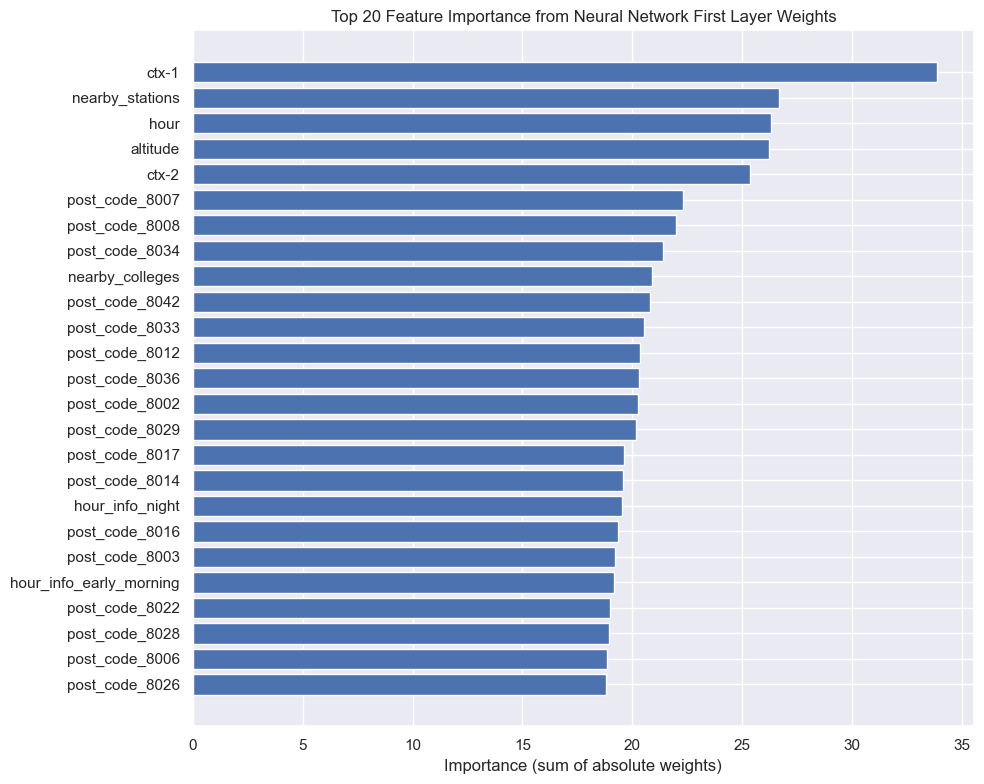

In [82]:
# Get weights of the first layer
weights = model_nn.layers[0].get_weights()[0]

# Check the shapes
print("Shape of weights:", weights.shape)  # Should match (input_dim, 256)

# Sum weights across the input dimensions to get a single importance score per feature
feature_importance = np.sum(np.abs(weights), axis=1)  # Using absolute values for importance

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Get the top 20 features based on importance
top_features = feature_names[sorted_idx][:25]
top_importance = feature_importance[sorted_idx][:25]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(top_features, top_importance, align='center')
plt.xlabel('Importance (sum of absolute weights)')
plt.title('Top 20 Feature Importance from Neural Network First Layer Weights')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()

The difference in variable importance between models like the Neural Network (NN) and others such as XGBoost or Linear Regression could stem from several factors:

Non-linear Relationships: Neural Networks can capture complex, non-linear relationships between features and the target variable. Variables that appear less important in linear models or tree-based models (like XGBoost) might contribute more significantly in NNs if they influence the outcome through non-linear interactions.

Feature Engineering: Neural Networks automatically learn feature interactions and representations from the data, whereas in XGBoost and Linear Regression, feature engineering (creating new features or transformations) might be more critical. If nearby_stations has nuanced interactions or its influence varies non-linearly across different contexts, NNs can potentially capture these subtleties better.

Overfitting: Neural Networks, especially if not properly regularized, can overfit to noisy or irrelevant features. This might lead to inflated importance scores for certain features, including nearby_stations, which might not generalize well across different datasets or validation sets.

# 4. Conclusions and Areas for Improvement

All models highlight ctx-1 and ctx-2 as crucial variables, which is logical given their contextual relevance. Variables like weather might be implicitly accounted within these contexts variables. We chose not to include weather directly in our model, particularly in Barcelona where bad weather is rare. Days with rain, which could impact dock availability, are infrequent, potentially causing imbalance issues in our dataset. Additionally, weather conditions are somehow implicit in our context variables of previous hours, so this would be already factored into our context variables.

Other variables added to our model provide modest performance improvements. Their importance is not as high as it is in ctx-1 and ctx-2 but helps explain predictions in specific cases: where the altitude is meaningful, also the postal code, etc.

Throughout this project, other evaluated variables did not substantially benefit our model. Thus, we opted for simplicity by including only the most impactful variables for prediction as we've done with the Light GBM model.

It is noteworthy that the variable nearby_stations demonstrates significant importance in the Neural Network model, whereas this is not observed in the other models.

Furthermore, the influence of altitude is somewhat mitigated by the Bicing station operators' efforts to rebalance bikes. While our data captures this effect, its impact is less pronounced.

Variables under consideration could potentially be enhanced by recalculating distances differently (near_colleges, near_transport, etc.). Moreover, creating a station type variable based on location, altitude, postal code, etc., and clustering stations according to their usage patterns (e.g., stations with frequent bike surpluses or deficits) could further improve our model's performance.

In conclusion, we have opted for the Light GBM model with a minimal feature set to predict the percentage of available docks. While the Neural Network model demonstrates comparable performance, it introduces additional complexity. It's worth noting that despite its slightly lower performance, the simplicity of the linear regression model offers a viable and straightforward approach.